# Import Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
filenya = files.upload()

Saving Data Fix 2.csv to Data Fix 2.csv


In [3]:
data=pd.read_csv('Data Fix 2.csv')

# Pre-Processing

In [4]:
data

,Kabupaten,TPT,TPAK,IPM,JPM,JAK
0,Kabupaten Cilacap,7.24,65.34,69.98,185.20,849621
1,Kabupaten Banyumas,4.17,67.34,71.96,211.60,876517
2,Kabupaten Purbalingga,4.73,68.14,68.99,140.10,481578
3,Kabupaten Banjarnegara,4.44,70.09,67.34,136.10,493718
4,Kabupaten Kebumen,4.69,68.72,69.60,201.30,621725
...,...,...,...,...,...,...
114,Kulonprogo,1.80,76.70,74.44,74.62,4614
115,Bantul,3.06,73.18,80.01,131.15,17700
116,Gunungkidul,1.92,76.31,69.96,123.08,8591
117,Sleman,3.93,70.52,83.85,90.17,26571


In [5]:
data=data.drop('Kabupaten', axis=1)
data

,TPT,TPAK,IPM,JPM,JAK
0,7.24,65.34,69.98,185.20,849621
1,4.17,67.34,71.96,211.60,876517
2,4.73,68.14,68.99,140.10,481578
3,4.44,70.09,67.34,136.10,493718
4,4.69,68.72,69.60,201.30,621725
...,...,...,...,...,...
114,1.80,76.70,74.44,74.62,4614
115,3.06,73.18,80.01,131.15,17700
116,1.92,76.31,69.96,123.08,8591
117,3.93,70.52,83.85,90.17,26571


In [6]:
data.describe()

,TPT,TPAK,IPM,JPM,JAK
count,119.000000,119.000000,119.000000,119.000000,1.190000e+02
mean,5.272269,67.780153,72.608151,104.554495,5.694449e+05
std,2.303348,3.688416,5.382120,62.920500,3.458538e+05
min,0.950000,58.610000,61.940000,3.000000,4.614000e+03
25%,3.540000,65.245000,68.670000,63.800000,3.748760e+05
50%,4.500000,67.670000,71.750000,98.370000,5.484500e+05
75%,7.185000,70.140000,75.585000,140.595000,7.243205e+05
max,10.650000,76.700000,86.650000,293.200000,1.507401e+06


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7fa2c7c090>,
      dtype=object)

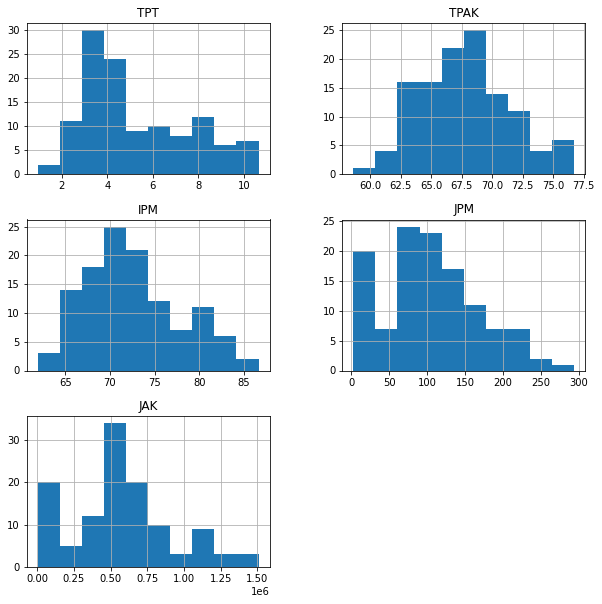

In [7]:
data.select_dtypes(include=['int64', 'float64']).hist(figsize=(10,10))

# Data Partition

In [8]:
X = data.drop('TPT', axis=1)
y = data['TPT']

# Print the sizes of the dataset
print("Number of Examples in the Dataset = ", X.shape[0])
print("Number of Features for each example = ", X.shape[1])
# print output range
print("Output Range = [%f, %f]" %(min(y), max(y)))

Number of Examples in the Dataset =  119
Number of Features for each example =  4
Output Range = [0.950000, 10.650000]


In [9]:
#Membagi_data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from tensorflow import random

seed = 1
np.random.seed(seed)
random.set_seed(seed)
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X), columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None, shuffle=False)

In [10]:
print (X_train)

        TPAK       IPM       JPM       JAK
0  -0.664369 -0.490376  1.287124  0.813525
1  -0.119839 -0.120936  1.708475  0.891621
2   0.097974 -0.675096  0.567316 -0.255132
3   0.628891 -0.982963  0.503475 -0.219882
4   0.255888 -0.561279  1.544085  0.151801
..       ...       ...       ...       ...
90  1.976605 -1.191940  1.714540  0.278507
91 -0.865846  1.020971 -1.340894 -1.222938
92  1.165254  1.110532 -1.507520 -1.419197
93 -0.514623  1.625509 -1.103884 -0.303025
94 -1.070045  0.123492 -1.407449 -1.312280

[95 rows x 4 columns]


In [11]:
X.describe()

,TPAK,IPM,JPM,JAK
count,1.190000e+02,1.190000e+02,1.190000e+02,1.190000e+02
mean,2.022658e-15,-2.709317e-15,-9.516197e-17,6.903908e-17
std,1.004228e+00,1.004228e+00,1.004228e+00,1.004228e+00
min,-2.496716e+00,-1.990528e+00,-1.620837e+00,-1.640055e+00
25%,-6.902346e-01,-7.348040e-01,-6.504529e-01,-5.649545e-01
50%,-2.999092e-02,-1.601190e-01,-9.870622e-02,-6.096137e-02
75%,6.425047e-01,5.554384e-01,5.752163e-01,4.496999e-01
max,2.428566e+00,2.620013e+00,3.010834e+00,2.723469e+00


# Modelling

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Activation

# Create the function that returns the keras model
def build_model():
    # build the Keras model
    model = Sequential()
    model.add(Dense(300, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(1))
    # Compile the model
    model.compile(loss='mean_squared_error', optimizer='adam')
    # return the model
    return model

In [13]:
# build the scikit-Learn interface for the keras model
from keras.wrappers.scikit_learn import KerasRegressor
YourModel = KerasRegressor(build_fn= build_model, epochs=200, batch_size=20, verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
# define the iterator to perform 5-fold cross validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)

In [15]:
# perform cross validation on X, y
from sklearn.model_selection import cross_val_score
results = cross_val_score(YourModel, X_train, y_train, cv=kf)

Epoch 1/200
4/4 [==============================] - 1s 4ms/step - loss: 36.6727
Epoch 2/200
4/4 [==============================] - 0s 3ms/step - loss: 34.6402
Epoch 3/200
4/4 [==============================] - 0s 3ms/step - loss: 32.8688
Epoch 4/200
4/4 [==============================] - 0s 3ms/step - loss: 30.9825
Epoch 5/200
4/4 [==============================] - 0s 3ms/step - loss: 29.2383
Epoch 6/200
4/4 [==============================] - 0s 3ms/step - loss: 27.5484
Epoch 7/200
4/4 [==============================] - 0s 4ms/step - loss: 25.8205
Epoch 8/200
4/4 [==============================] - 0s 4ms/step - loss: 24.1762
Epoch 9/200
4/4 [==============================] - 0s 3ms/step - loss: 22.5004
Epoch 10/200
4/4 [==============================] - 0s 3ms/step - loss: 20.9997
Epoch 11/200
4/4 [==============================] - 0s 4ms/step - loss: 19.4503
Epoch 12/200
4/4 [==============================] - 0s 5ms/step - loss: 18.0331
Epoch 13/200
4/4 [==============================]

In [16]:
# print the result
print(f"Final Cross Validation Loss = {abs(results.mean()):.4f}")

Final Cross Validation Loss = 4.8090


## Mencari model terbaik dengan Cross Validation

In [17]:
# Defne the Keras models
from keras.models import Sequential
from keras.layers import Dense

def build_model_1():
    # build the Keras model_1
    model = Sequential()
    model.add(Dense(100, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(1))
    # Compile the model
    model.compile(loss='mean_squared_error', optimizer='adam')
    # return the model
    return model

def build_model_2():
    # build the Keras model_2
    model = Sequential()
    model.add(Dense(300, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(1))
    # Compile the model
    model.compile(loss='mean_squared_error', optimizer='adam')
    # return the model
    return model

def build_model_3():
    # build the Keras model_3
    model = Sequential()
    model.add(Dense(300, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    # Compile the model
    model.compile(loss='mean_squared_error', optimizer='adam')
    # return the model
    return model

In [18]:
# define a seed for random number generator so the result will be reproducible
from tensorflow import random 
import numpy as np

seed = 1
np.random.seed(seed)
random.set_seed(seed)

# perform cross validation on each model
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


models = [build_model_1, build_model_2, build_model_3]

In [19]:
# loop over three models
results_1=[]
for m in range(len(models)):
    model = KerasRegressor(build_fn=models[m], epochs=200, batch_size=20, verbose=1, shuffle=False)
    kf = KFold(n_splits=3)
    result = cross_val_score(model, X_train, y_train, cv=kf)
    results_1.append(result)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  after removing the cwd from sys.path.


Epoch 1/200
4/4 [==============================] - 0s 4ms/step - loss: 35.6165
Epoch 2/200
4/4 [==============================] - 0s 4ms/step - loss: 34.5867
Epoch 3/200
4/4 [==============================] - 0s 4ms/step - loss: 33.6518
Epoch 4/200
4/4 [==============================] - 0s 5ms/step - loss: 32.7410
Epoch 5/200
4/4 [==============================] - 0s 3ms/step - loss: 31.8463
Epoch 6/200
4/4 [==============================] - 0s 4ms/step - loss: 30.9655
Epoch 7/200
4/4 [==============================] - 0s 4ms/step - loss: 30.0973
Epoch 8/200
4/4 [==============================] - 0s 3ms/step - loss: 29.2400
Epoch 9/200
4/4 [==============================] - 0s 3ms/step - loss: 28.3922
Epoch 10/200
4/4 [==============================] - 0s 3ms/step - loss: 27.5548
Epoch 11/200
4/4 [==============================] - 0s 3ms/step - loss: 26.7254
Epoch 12/200
4/4 [==============================] - 0s 4ms/step - loss: 25.9046
Epoch 13/200
4/4 [==============================]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  after removing the cwd from sys.path.


4/4 [==============================] - 0s 4ms/step - loss: 38.0854
Epoch 2/200
4/4 [==============================] - 0s 3ms/step - loss: 36.2628
Epoch 3/200
4/4 [==============================] - 0s 3ms/step - loss: 34.6341
Epoch 4/200
4/4 [==============================] - 0s 3ms/step - loss: 33.0726
Epoch 5/200
4/4 [==============================] - 0s 4ms/step - loss: 31.5637
Epoch 6/200
4/4 [==============================] - 0s 4ms/step - loss: 30.0973
Epoch 7/200
4/4 [==============================] - 0s 3ms/step - loss: 28.6693
Epoch 8/200
4/4 [==============================] - 0s 3ms/step - loss: 27.2747
Epoch 9/200
4/4 [==============================] - 0s 3ms/step - loss: 25.9094
Epoch 10/200
4/4 [==============================] - 0s 4ms/step - loss: 24.5679
Epoch 11/200
4/4 [==============================] - 0s 4ms/step - loss: 23.2481
Epoch 12/200
4/4 [==============================] - 0s 4ms/step - loss: 21.9491
Epoch 13/200
4/4 [==============================] - 0s 3ms/st

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  after removing the cwd from sys.path.


4/4 [==============================] - 1s 6ms/step - loss: 34.5126
Epoch 2/200
4/4 [==============================] - 0s 6ms/step - loss: 30.6959
Epoch 3/200
4/4 [==============================] - 0s 4ms/step - loss: 27.2082
Epoch 4/200
4/4 [==============================] - 0s 6ms/step - loss: 23.6525
Epoch 5/200
4/4 [==============================] - 0s 4ms/step - loss: 20.1147
Epoch 6/200
4/4 [==============================] - 0s 4ms/step - loss: 16.6977
Epoch 7/200
4/4 [==============================] - 0s 4ms/step - loss: 13.5524
Epoch 8/200
4/4 [==============================] - 0s 4ms/step - loss: 10.8527
Epoch 9/200
4/4 [==============================] - 0s 4ms/step - loss: 8.7583
Epoch 10/200
4/4 [==============================] - 0s 4ms/step - loss: 7.3208
Epoch 11/200
4/4 [==============================] - 0s 4ms/step - loss: 6.4440
Epoch 12/200
4/4 [==============================] - 0s 4ms/step - loss: 5.9358
Epoch 13/200
4/4 [==============================] - 0s 4ms/step -

In [20]:
# print the cross validation scores
print("Cross Validation Loss for Model 1 =", abs(results_1[0].mean()))
print("Cross Validation Loss for Model 2 =", abs(results_1[1].mean()))
print("Cross Validation Loss for Model 3 =", abs(results_1[2].mean()))

Cross Validation Loss for Model 1 = 4.840497891108195
Cross Validation Loss for Model 2 = 4.409692207972209
Cross Validation Loss for Model 3 = 4.253896911938985


## Mencari jumlah epoch dan batch terbaik

In [21]:
# define a seed for random number generator so the result will be reproducible
np.random.seed(seed)
random.set_seed(seed)
results_2 = []
epochs = [100, 150, 200]
batches = [10, 20, 15]

# Loop over pairs of epochs and batch_size
for e in range(len(epochs)):
    for b in range(len(batches)):
        model = KerasRegressor(build_fn= build_model_2, epochs= epochs[e], batch_size= batches[b], verbose=0, shuffle=False)
        kf = KFold(n_splits=3)
        result = cross_val_score(model, X_train, y_train, cv=kf)
        results_2.append(result)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py

In [22]:
#Print cross validation score for each possible pair of epochs, batch_size
c = 0
for e in range(len(epochs)):
    for b in range(len(batches)):
        print("batch_size =", batches[b],", epochs =", epochs[e], ", Test Loss =", abs(results_2[c].mean()))
        c += 1

batch_size = 10 , epochs = 100 , Test Loss = 4.681068857510884
batch_size = 20 , epochs = 100 , Test Loss = 4.79694910844167
batch_size = 15 , epochs = 100 , Test Loss = 4.65790589650472
batch_size = 10 , epochs = 150 , Test Loss = 4.403629024823506
batch_size = 20 , epochs = 150 , Test Loss = 4.451554377873738
batch_size = 15 , epochs = 150 , Test Loss = 4.478639125823975
batch_size = 10 , epochs = 200 , Test Loss = 4.310213049252828
batch_size = 20 , epochs = 200 , Test Loss = 4.281707684199016
batch_size = 15 , epochs = 200 , Test Loss = 4.309472640355428


## Tunning kembali

In [23]:
# Modify build_model_2 function
def build_model_3(activation='relu', optimizer='adam'):
    # build the Keras model_3
    model = Sequential()
    model.add(Dense(300, input_dim=X_train.shape[1], activation=activation))
    model.add(Dense(50, activation=activation))
    model.add(Dense(1))

    # Compile the model
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    # return the model
    return model

In [24]:
results_3 = []
activations = ['relu', 'tanh']
optimizers = ['sgd', 'adam', 'rmsprop']

# define a seed for random number generator so the result will be reproducible
np.random.seed(seed)
random.set_seed(seed)
# Loop over pairs of activation and optimizer
for o in range(len(optimizers)):
    for a in range(len(activations)):
        optimizer = optimizers[o]
        activation = activations[a]
        model = KerasRegressor(build_fn= build_model_3, epochs=100, batch_size=15, verbose=0, shuffle=False)
        kf = KFold(n_splits=3)
        result = cross_val_score(model, X_train, y_train, cv=kf)
        results_3.append(result)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  del sys.path[0]
/usr/local/lib/python3.7/

In [25]:
# Print cross validation score for each possible pair of optimizer, activation
c = 0
for o in range(len(optimizers)):
    for a in range(len(activations)):
        print("activation = ", activations[a],", optimizer = ", optimizers[o], ", Test Loss = ", abs(results_3[c].mean()))
        c += 1

activation =  relu , optimizer =  sgd , Test Loss =  4.247174620628357
activation =  tanh , optimizer =  sgd , Test Loss =  4.351202567418416
activation =  relu , optimizer =  adam , Test Loss =  4.372154156366984
activation =  tanh , optimizer =  adam , Test Loss =  4.43145493666331
activation =  relu , optimizer =  rmsprop , Test Loss =  4.160739302635193
activation =  tanh , optimizer =  rmsprop , Test Loss =  4.221116542816162


## Model terbaik yang dihasilkan

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from tensorflow import random

In [27]:
activation = 'relu' 
optimizer = 'rmsprop' 
batch_size = 20 
epochs = 200 
model = KerasRegressor(build_fn=build_model_2, epochs=epochs, batch_size=batch_size, verbose=1, shuffle=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  """


## Data Validation 0.2

In [28]:
# train the model while storing all loss values
history=model.fit(X_train, y_train, validation_split=0.2, shuffle=False)

Epoch 1/200
4/4 [==============================] - 0s 43ms/step - loss: 33.2587 - val_loss: 15.0914
Epoch 2/200
4/4 [==============================] - 0s 10ms/step - loss: 31.4704 - val_loss: 14.0004
Epoch 3/200
4/4 [==============================] - 0s 9ms/step - loss: 29.7797 - val_loss: 12.9619
Epoch 4/200
4/4 [==============================] - 0s 10ms/step - loss: 28.1523 - val_loss: 11.9742
Epoch 5/200
4/4 [==============================] - 0s 11ms/step - loss: 26.5781 - val_loss: 11.0350
Epoch 6/200
4/4 [==============================] - 0s 9ms/step - loss: 25.0504 - val_loss: 10.1405
Epoch 7/200
4/4 [==============================] - 0s 10ms/step - loss: 23.5665 - val_loss: 9.2894
Epoch 8/200
4/4 [==============================] - 0s 10ms/step - loss: 22.1230 - val_loss: 8.4824
Epoch 9/200
4/4 [==============================] - 0s 11ms/step - loss: 20.7176 - val_loss: 7.7185
Epoch 10/200
4/4 [==============================] - 0s 11ms/step - loss: 19.3538 - val_loss: 6.9989
Epoch

plot training error and test error plots dengan 10% data validasi


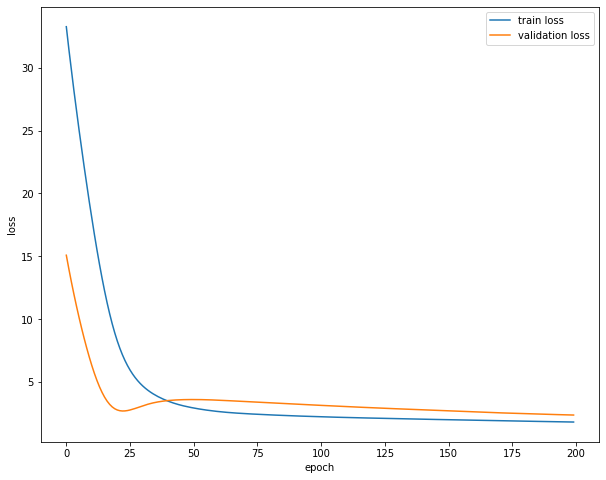

In [29]:
plt.rcParams['figure.figsize'] = (10.0, 8.0) 

print('plot training error and test error plots dengan 10% data validasi')
# plot training error and test error plots 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')

In [30]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test,y_pred)
r2_test = r2_score(y_test,y_pred)

# print the best accuracy reached on training set and the test set
print(f"Best Loss/MSE on training set = {min(history.history['loss']):.3f}")
print(f"Best loss/MSE on validation set = {min(history.history['val_loss']):.3f}")
print(f"MSE on test set = {mse_test:.3f}")
print(f"R2 on test set = {r2_test:.3f}")  

2/2 [==============================] - 0s 4ms/step
Best Loss/MSE on training set = 1.831
Best loss/MSE on validation set = 2.387
MSE on test set = 6.399
R2 on test set = -0.078


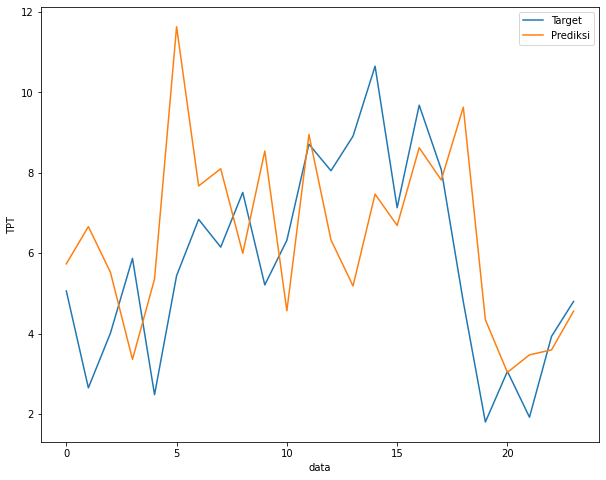

In [31]:
plt.rcParams['figure.figsize'] = (10.0, 8.0) 

# plot training error and test error plots 
plt.plot(y_test.to_numpy())
plt.plot(y_pred)
plt.ylabel('TPT')
plt.xlabel('data')
plt.legend(['Target', 'Prediksi'], loc='upper right')

In [33]:
print(y_pred)

array([ 5.7334867,  6.660341 ,  5.523475 ,  3.3584085,  5.355327 ,
       11.632016 ,  7.671036 ,  8.099243 ,  5.9965787,  8.539099 ,
        4.5664387,  8.949498 ,  6.329803 ,  5.183907 ,  7.468214 ,
        6.6872945,  8.621923 ,  7.818992 ,  9.629938 ,  4.3439074,
        3.034079 ,  3.471085 ,  3.5942466,  4.5580983], dtype=float32)

# Kesimpulan

In [34]:
print('Table Perbandingan Model')
data = {'Data Validasi': ['20%'],  
        'Best Loss/MSE on training set': [min(history.history['loss'])],
        'Best Loss/MSE on validation set': [min(history.history['val_loss'])],
        'MSE on test set': [mse_test],
        'R2 on test set': [r2_test]}
df = pd.DataFrame(data)
df

Table Perbandingan Model


,Data Validasi,Best Loss/MSE on training set,Best Loss/MSE on validation set,MSE on test set,R2 on test set
0,20%,1.830893,2.386857,6.398501,-0.078378
